In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('./cleaned_data.csv')
df

,Age,Sex,Race,Marital status,Education,Employment,Incomes,Number of books read,Printed books?,Audiobooks?,E-books?,Source of the last book read,Daily news/newspapers reader?,Magazines/Journals reader?
0,46,Male,Native American,Married,High school,Employed full-time,<$10k,97,Yes,Yes,Yes,Purchased,Yes,Yes
1,32,Male,Mixed race,Never been married,High school,Employed full-time,<$10k,97,No,Yes,Yes,Borrowed from others,Yes,Yes
2,27,Male,Mixed race,Married,High school,Employed full-time,$40k-50k,97,Yes,No,Yes,Borrowed from library,Yes,No
3,16,Female,Mixed race,Never been married,Some high school,Employed part-time,$10k-20k,97,Yes,Yes,No,Purchased,Yes,No
4,55,Female,Asian/Pacific Islander,Divorced,Some college,Self-employed,$40k-50k,97,Yes,Yes,Yes,Purchased,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,16,Female,White,Never been married,Some high school,Unemployed,$30k-40k,1,Yes,No,No,Purchased,No,No
2078,16,Female,White,Never been married,Some high school,Unemployed,<$10k,1,Yes,No,No,Borrowed from library,No,No
2079,16,Male,White,Never been married,Some high school,Unemployed,$100k-150k,1,No,No,No,Other sources,Yes,No
2080,16,Female,White,Never been married,Some high school,Employed part-time,$100k-150k,1,Yes,No,No,Borrowed from others,No,Yes


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 3: Tình trạng hôn nhân và việc đọc sách điện tử/ sách in/ sách nói trong năm có mối quan hệ như thế nào?"   </b></font>
</div>


#### Lợi ích việc trả lời câu hỏi này: 
Hiểu rõ hơn về các nhóm độc giả, mà còn tạo ra những cơ hội mới để phát triển sản phẩm, chiến lược tiếp thị và nội dung phù hợp, đồng thời mang lại giá trị lớn cho các tổ chức trong ngành xuất bản, công nghệ và nghiên cứu hành vi tiêu dùng.

#### Các bước xử lí:
- Chuyển đổi dữ liệu: Các cột liên quan đến việc đọc sách (sách in, sách điện tử, sách nói) được chuyển đổi thành giá trị có thể phân tích (Yes/No thành 1/0).
- Tạo các nhóm theo tình trạng hôn nhân
- Kiểm tra sự phân phối: Dùng các biểu đồ tròn để xem tỷ lệ người đọc sách điện tử, sách in, sách nói theo tình trạng hôn nhân.
- Phân tích kết quả: Xem liệu có sự khác biệt rõ rệt giữa các nhóm tình trạng hôn nhân đối với việc đọc các loại sách hay không.

In [16]:
# Chuẩn hóa cột 'Marital status?' thành các nhóm
def map_marital_status(status):
    if status in ['Married', 'Living with a partner']:
        return 'Married or Living with a partner'
    elif status in ['Single', 'Never been married']:
        return 'Single'
    elif status == 'Divorced':
        return 'Divorced'
    elif status == 'Widowed':
        return 'Widowed'
    elif status == 'Separated':
        return 'Separated'
    else:
        return 'Unknown'

df['Marital Status Grouped'] = df['Marital status'].apply(map_marital_status)
print(df[['Marital status', 'Marital Status Grouped']].head())

       Marital status            Marital Status Grouped
0             Married  Married or Living with a partner
1  Never been married                            Single
2             Married  Married or Living with a partner
3  Never been married                            Single
4            Divorced                          Divorced


#### Mối quan hệ giữa tình trạng hôn nhân với việc đọc sách điện tử:

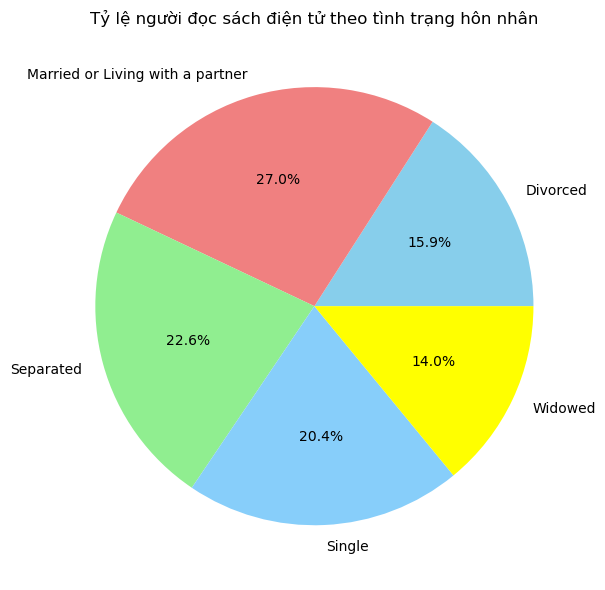

In [18]:
# Chuyển đổi cột 'E-books?' từ Yes/No thành 1/0
df['E-books?'] = df['E-books?'].map({'Yes': 1, 'No': 0})
# Tính tỷ lệ trung bình người đọc sách điện tử cho mỗi nhóm tình trạng hôn nhân
marital_e_books = df.groupby('Marital Status Grouped')['E-books?'].mean() 

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
marital_e_books.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'yellow', 'pink'])
plt.title('Tỷ lệ người đọc sách điện tử theo tình trạng hôn nhân')
plt.ylabel('')  
plt.tight_layout()
plt.show()

##### Nhận xét:
- Nhóm "Married or Living with a partner" dẫn đầu trong việc đọc sách điện tử, có thể do họ tìm kiếm sự tiện lợi trong việc truy cập tài liệu.
- Các nhóm độc thân, ly thân, hoặc ly hôn cũng có tỷ lệ tương đối.
- Tỷ lệ thấp ở nhóm "Widowed" có thể gợi ý nhu cầu cung cấp các chương trình hoặc nền tảng hỗ trợ nhóm này tiếp cận công nghệ đọc sách điện tử.
- Chênh lệch giữa nhóm cao nhất "Married or Living with a partner" và nhóm thấp nhất "Widowed" khá đáng kể, cho thấy tình trạng hôn nhân có ảnh hưởng đến thói quen đọc sách điện tử.

#### Mối quan hệ giữa tình trạng hôn nhân với việc đọc sách in:

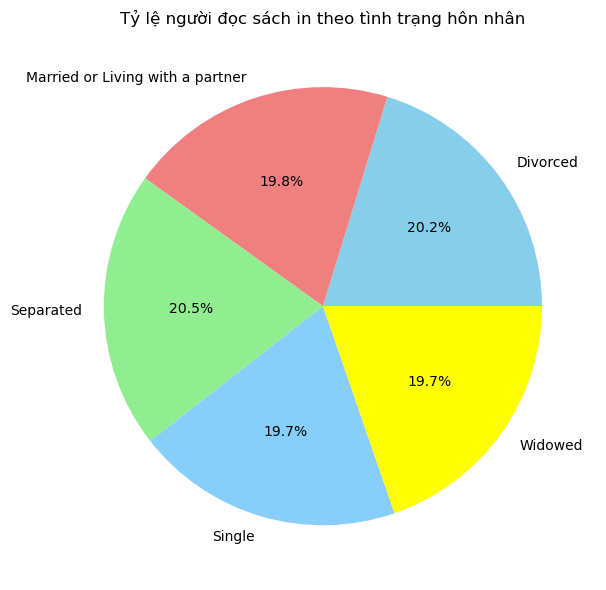

In [20]:
# Chuyển đổi cột 'Printed books?' từ Yes/No thành 1/0
df['Printed books?'] = df['Printed books?'].map({'Yes': 1, 'No': 0})
# Tính tỷ lệ trung bình người đọc sách in cho mỗi nhóm tình trạng hôn nhân
marital_e_books = df.groupby('Marital Status Grouped')['Printed books?'].mean() 

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
marital_e_books.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'yellow', 'pink'])
plt.title('Tỷ lệ người đọc sách in theo tình trạng hôn nhân')
plt.ylabel('')  
plt.tight_layout()
plt.show()

##### Nhận xét: 
- Sách in vẫn giữ được sức hút đồng đều giữa các nhóm tình trạng hôn nhân, không có sự chênh lệch rõ rệt nào về tỷ lệ sử dụng.
- Tỷ lệ cao nhất thuộc về nhóm "Separated" (20.5%), có thể do nhu cầu thư giãn hoặc học hỏi.
- Nhóm "Widowed" và "Single" có xu hướng thấp hơn đôi chút, có thể họ ưu tiên các phương tiện khác.

#### Mối quan hệ giữa tình trạng hôn nhân với việc đọc sách nói:

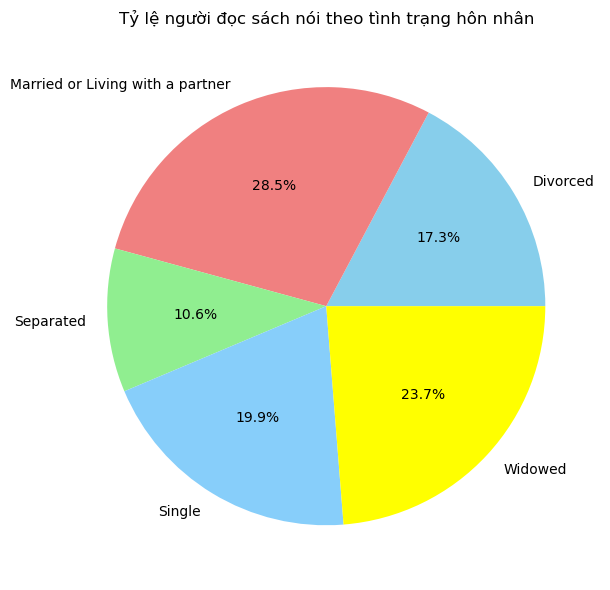

In [22]:
# Chuyển đổi cột 'Audiobooks?' từ Yes/No thành 1/0
df['Audiobooks?'] = df['Audiobooks?'].map({'Yes': 1, 'No': 0})
# Tính tỷ lệ trung bình người đọc sách nói cho mỗi nhóm tình trạng hôn nhân
marital_e_books = df.groupby('Marital Status Grouped')['Audiobooks?'].mean() 

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
marital_e_books.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'yellow', 'pink'])
plt.title('Tỷ lệ người đọc sách nói theo tình trạng hôn nhân')
plt.ylabel('')  
plt.tight_layout()
plt.show()

##### Nhận xét: 
- Sách nói phổ biến nhất ở nhóm "Married or Living with a partner", có thể họ tận dụng lợi ích tiện lợi của sách nói trong cuộc sống hàng ngày.
- Nhóm "Widowed" cũng có tỷ lệ sử dụng cao, sách nói có thể là hình thức giải trí phù hợp với nhóm đối tượng này.
- Tỷ lệ thấp ở nhóm "Separated", có thể do họ ít tiếp cận với phương tiện này hoặc có ít thời gian hơn để sử dụng sách nói.

#### Kết luận chung: 
- Nhóm "Married or Living with a partner" sử dụng sách điện tử và sách nói nhiều nhất.
- Sách in phổ biến và ổn định trong mọi nhóm.
- Nhóm "Widowed" ưa chuộng sách nói, trong khi nhóm "Separated" có xu hướng ít sử dụng cả ba loại sách.
- Như vậy, nhu cầu đọc sách thay đổi dựa trên tình trạng hôn nhân và cách mỗi nhóm sử dụng các hình thức đọc để phù hợp với lối sống của họ. Điều này cung cấp thông tin hữu ích cho các chiến lược tiếp thị và phát triển sản phẩm trong ngành xuất bản.